# Women and Children first!
## An analysis of survival rates of passengers aboard the Titanic
### Guy Bourne
#### Udacity Data Analysis Nanodegree Project 2: Investigate a dataset

## Introduction
This report aims to explore and evaluate the popular Titanic dataset from [Kaggle](https://www.kaggle.com/c/titanic "Titanic dataset on Kaggle"). Primarily we will investigate the gender, travel class and age. The usual modus operandi with this dataset is to look at the relationship if the variables and survival. We'll be taking a look at that and anything else interesting that crops up along the way. In particular, we'll be taking a look at the old addage "Women and Children first!" and seeing whther this really was the case with the sinking of the Titanic. 

Whilst women are well defined in the dataset, let us set a threshold on age for a 'child'. 

Lisa Wade makes the point  

>_"The idea that children should have a childhood is actually pretty recent. Before industrialization, when families tended to work their own land, children got to work as soon as they were able.  Being apprentices to their parents was the difference between life and death... The first federal law regulating child labor was passed in 1938."_

_Lisa Wade, [Child Labour in America 1908-1912](https://thesocietypages.org/socimages/2009/12/03/child-labor-in-america-1908-1912/, "Link to images")_

For now let's set the threshold at 10 years old. I know my Dad certainly thought I should be earning my keep by then (but it was more washing dishes and paper rounds than manual labour...)

To conduct this analysis, we will follow the process below:

* Ingest the data in CSV format
* Perform basic checks on the data to understand if any wrangling is required
* Perform univariate analysis to understand frequencies and distributions of the data
* Perform multivariate analysis, specifically looking at correlations and scatter plots to observe any non linear relationships

Once the initial analysis phase is complete, we will evaluate our findings and apply tests to measure their statistical significance, capturing our conclusions.

It is worth noting that this project has a number of limitations, namely:

1. I'm a n00b @ python
2. Jupyter is also new for me (but I'm liking it)!
3. There are likely to be data quality issues that require assumptions
4. This analysis will not include regression modelling, limiting our ability to measure each variable in complete context.

Enough waffle. Let's crack on with the fun stuff.

### Environment Setup

In [1]:
### IMPORT PACKAGES

import pandas as pd
from pandas.tools import plotting
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib as plt
import seaborn as sns

%matplotlib inline

### Importing the data
Now that we have the relevant packages imported, we can bring in the data.

In [2]:
### IMPORT THE TITANIC DATASET

raw_data = pd.read_csv('titanic.csv')

## lOOK AT THE SHAPE OF THE DATA 
print "The data has the following shape (Row,Col):", raw_data.shape
print '\n'

##Display the top 10 rows
print "Displaying the first 10 rows of data..."
print '\n'
raw_data[0:10]

The data has the following shape (Row,Col): (891, 12)


Displaying the first 10 rows of data...




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


By viewing the top 10 rows of the data we can get a glimpse of the data. Even within the first 10 rows there are missing values in the Age and Cabin variables.

### Univariate analysis and initial exploration
Let's explore the data in more detail. We'll begin by producing the summary statistics for all numeric variables.

In [3]:
### OUTPUT SUMMARY STATISTICS 
print "Print summary stats for all numeric variables"
print raw_data.describe()
print '\n'
print 'Counts for sex'
print raw_data['Sex'].value_counts()
print '\n'
print 'Counts for Embarked'
print raw_data['Embarked'].value_counts()

Print summary stats for all numeric variables
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Counts for sex
male      577
fema

As expected, we can see that there are missing values for age, there are only 714 logged. 

Let's look at some basic plots. Age and fare are our only true continuous variables so let's only draw scatters for them.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A46FA20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A7B3470>]], dtype=object)

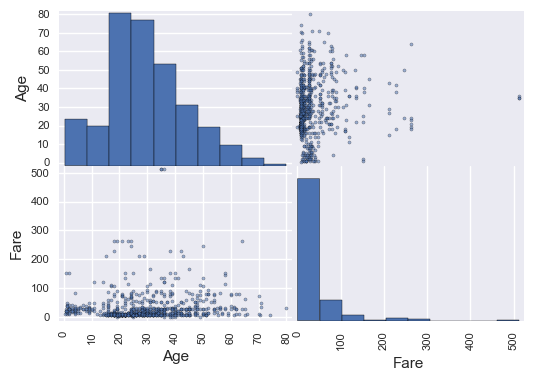

In [4]:
plotting.scatter_matrix(raw_data[['Age','Fare']])

Age has a fairly normal distribution as you'd expect, with fare having a heavy right tail, indicating that there were some passengers that paid significantly more for there tickets. It's also worth noting the relationship between the variables. The top left scatter indicate either a linearly or logarithmically increase in age as the fare increases. We'll look at this in more detail later.  

We notice that those who paid the highest amounts are in their mid thirties. Let's have a look at their data.

In [5]:
raw_data.sort_values('Fare',ascending=False)[0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


Interesting that two of them are called Fortune!

#### Wrangling
Our first point of order should be to define our child flag for those under 10 years of age. 

In [6]:
### CREATE A CHILD_FLAG VARIABLE

raw_data['child_flag'] = raw_data['Age']<10

print "Looks like we have ", raw_data['child_flag'].sum(), "Children in our dataset"

Looks like we have  62 Children in our dataset


In addition, we should deal with the missing age values. We could simply usethe sample mean, but it would be better to observe the relationship between some of the other variables and age first. Travel class could be related. Let's draw a box plot.

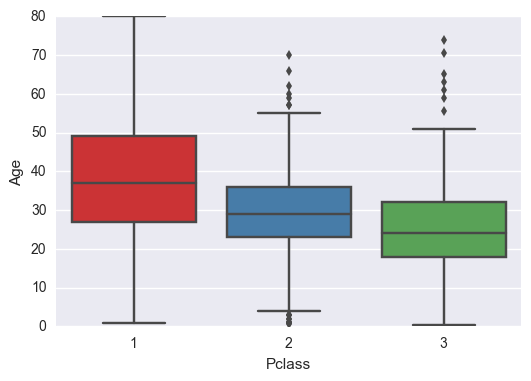

In [7]:
### CREATE SOME BASIC PLOTS TO EXPLORE AGE

## BOX PLOTS BY CLASS

sns.boxplot(x="Pclass", y="Age", data=raw_data, palette="Set1");

It's pretty clear from the plot that the distribution of age is different within the different classes of travel. This isn't  surprising given the cost associated with the class of travel in question (shown below). Fur curiosities sake, rather than a box plot, we've used a violin plot to understand this relationship. This gives extra information on the Kernal desnsity estimation and allows us to split by other variables.

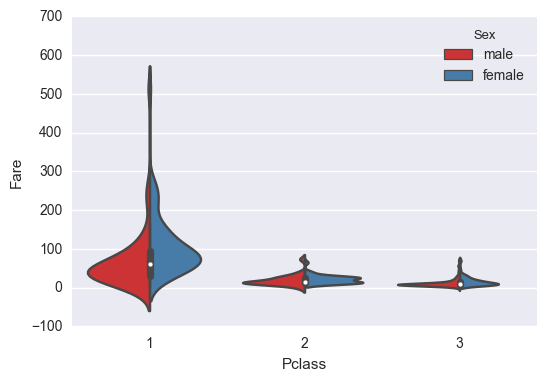

In [8]:
## VIOLIN PLOTS BY PCLASS

sns.violinplot(x="Pclass", y="Fare", hue = "Sex", data=raw_data, split = True, palette="Set1");


On top of demonstrating the difference in fare (which we could test more thorougly, if it wasn't pointless!), the charts also indicate that women tend to pay more than men. This could be an interesting test outside of our survival question and help us understand the demographics and sociology of the time. But enough anthropolgy for now.

Back to the case in hand. Age imputation. Other variables were also analysed against age, however neither embarking location or gender demonstrated significant differences in age distributions. We'll create a function to impute a variable using the mean, based on a user input group. This could come in handy for variables other than age, or even other data sets with far more variables!

In [9]:
### GROUP THE DATA AND CALCULATE THE MEAN

## THIS COULD BE USEFUL - CREATE A FUNCTION

def groupedMean(data,groupVar,aggVar):
    #CREATE GROUP OBJECT
    groupby_var = data[aggVar].groupby(data[groupVar])
    #RETURN CALC
    return groupby_var.mean()


## THAT'S PRETTY USEFUL, BUILD ONE FOR DESC WHICH MAY COME IN HANDY LATER
def groupedDesc(data,groupVar,aggVar):
     #CREATE GROUP OBJECT
    groupby_var = data[aggVar].groupby(data[groupVar])
    #RETURN CALC
    return groupby_var.describe()

#Print the values that we'll be using

print "Here are the values for age that we'll be using to replace the missing values"
print '\n'
print groupedMean(raw_data,'Pclass','Age')


## CREATE A FUNCTION TO IMPUTE THE MEAN BY A GROUP AND TAG ROWS WITH IMPUTED VALUES
def imputeMean(data,variable,group,flag):
    ## CREATE FLAG
    if flag == 1:
        data['imp_flag'] = data[variable].isnull()
        ## IMPUTE THE VARIABLE
    data[variable].fillna(data.groupby(group)[variable].transform("mean"),inplace=True)

imputeMean(raw_data,'Age','Pclass',1)

##CHECK THE OUTPUT
print "Looks like we have ", raw_data['imp_flag'].sum(), "missing ages in our dataset"
print '\n'
print "Let's check out the first 10 rows..."
raw_data[raw_data['imp_flag'] ==True][0:10]
print "Looking good!"


Here are the values for age that we'll be using to replace the missing values


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64
Looks like we have  177 missing ages in our dataset


Let's check out the first 10 rows...
Looking good!


Now that we've cleaned u our data a bit, lets talke a look at some distributions.

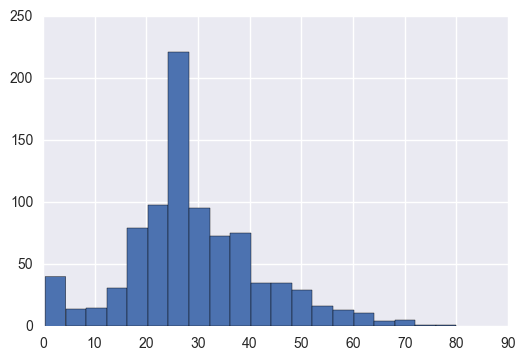

In [10]:
### Evaluate age
raw_data['Age'].hist(bins=20)

We can see that there are a large number of travellers in their mid 20's. A quick box plot will let us see how age was related to survival.

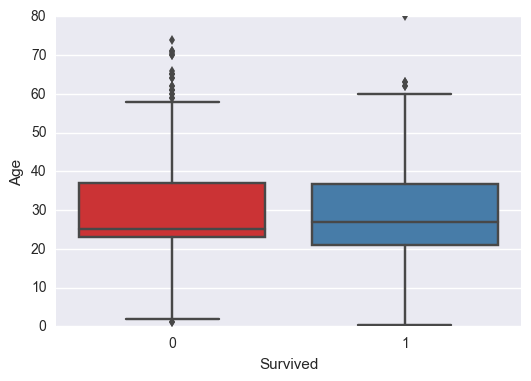

In [11]:
### BOX PLOT BY SURVIVED
sns.boxplot(x='Survived',y='Age', data = raw_data, palette = 'Set1')

It doesn't appear that there's much of a relationship between age an whether or not someone survived. However, box plots alone aren't incredibly useful for answering our question around "Women and children first!". Let's createa a violin plot and check out the distributions.

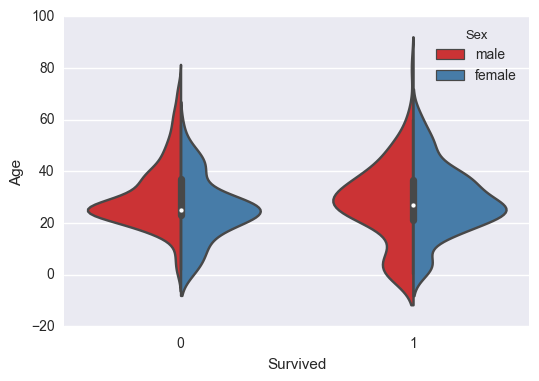

In [12]:
## VIOLIN PLOTS AGE BY Survived

sns.violinplot(x="Survived", y="Age", hue = "Sex", data=raw_data, split = True, palette="Set1");

The chart indicates that very few male children died as the titanic sank. The distributions of the survivors are also quite interesting. We can see that there is a distinct pattern where young children are concerned. Let's look at some raw numbers and proportions to see if we can tease out any more information.

We will look at the survival rate (proportion of survivors) within the dataset and split by our two key variables of interest, namely, Sex and child_flag. Once we have these statistics, we can test for difference using hypothesis tests.

### Survival rate
#### Men vs. Women

In [13]:
pd.pivot_table(raw_data,index=["Sex"],values=["Survived"],aggfunc=[np.sum,len,np.mean])


,sum,len,mean
,Survived,Survived,Survived
Sex,,,
female,233,314,0.742038
male,109,577,0.188908


We can see that 74% of women survived vs 19% of men. Whilst these are clearly quite different, let us formally test for statistical significance, with an aplha of 0.05.

Our Null Hypothesis is that the sample means are equal.

In [14]:

female_surv = raw_data[raw_data["Sex"] == "female"]["Survived"]
male_surv = raw_data[raw_data["Sex"] == "male"]["Survived"]

print stats.ttest_ind(female_surv, male_surv)   

Ttest_indResult(statistic=19.297816550123351, pvalue=1.4060661308802594e-69)


our p-value is less than alpha, so we reject the null hypothesis. The difference between men and women's survival on the Titancic is statistically significant. 

#### Children vs Adults

In [15]:
pd.pivot_table(raw_data,index=["child_flag"],values=["Survived"],aggfunc=[np.sum,len,np.mean])

,sum,len,mean
,Survived,Survived,Survived
child_flag,,,
False,304,829,0.366707
True,38,62,0.612903


Here we see that 61% of under 10's survived vs 37% of over 10's. Again these are clearly quite different, let us formally test for statistical significance, with an aplha of 0.05.

Our Null Hypothesis is that the sample means are equal.

In [16]:

child_surv = raw_data[raw_data["child_flag"] == True]["Survived"]
adult_surv = raw_data[raw_data["child_flag"] == False]["Survived"]

print stats.ttest_ind(child_surv, adult_surv)  

Ttest_indResult(statistic=3.8729296670334277, pvalue=0.00011541877366890436)


our p-value is less than alpha, so we reject the null hypothesis. The difference between adult and children's survival on the Titancic is statistically significant.

#### Combining the two

In [17]:
pd.pivot_table(raw_data,index=["Sex","child_flag"],values=["Survived"],aggfunc=[np.sum,len,np.mean])

sum      len      mean
                  Survived Survived  Survived
Sex    child_flag                            
female False           214      284  0.753521
       True             19       30  0.633333
male   False            90      545  0.165138
       True             19       32  0.593750

It looks like the gender of a child had very little influence on whether or not they survived the disaster. Here our Null hypothesis is that Male Children's survival rate is the same as Female Children. Again, we'll take an alpha of 0.05.

In [18]:

f_child_surv = raw_data[(raw_data["child_flag"] == True) & (raw_data["Sex"] == "female")]["Survived"]
m_child_surv = raw_data[(raw_data["child_flag"] == True) & (raw_data["Sex"] == "male")]["Survived"]

print stats.ttest_ind(f_child_surv, m_child_surv)  

Ttest_indResult(statistic=0.3148361724680071, pvalue=0.7539783396232792)


Here, our p-value is larger than alpha, so we cannot reject the null hypothesis. This means that there is no statistical evidence to suggest that gender has any role to play in the survival of the titanic disaster when controling for age<10.

Finally we'll test if being a woman OR a child offers is statistically significant to being an adult male.

In [19]:

f_or_child_surv = raw_data[(raw_data["child_flag"] == True) | (raw_data["Sex"] == "female")]["Survived"]
m_adult_surv = raw_data[(raw_data["child_flag"] == False) & (raw_data["Sex"] == "male")]["Survived"]

print stats.ttest_ind(f_or_child_surv, m_adult_surv) 

Ttest_indResult(statistic=20.38557475614347, pvalue=4.3258881573347164e-76)


This is our most conclusive finding yet, allowing us to once more reject the Null and be confident that women and children were treated differently as the ship was sinking.

### Conclusion

We can be confident that as the rescue operations were underway, the passengers and crew followed the motto of **"Women and Children first!**. There's a lot more to be analysed in this data set, particularly the impacts of affluence (through travel class), whether or not travelling with family contributed to survival; in the case of father, perhaps this would have a negative impact on chance of survival? Who knows? We could, with a little more time and analysis, particularly expanding this work with linear regression.

I've thoroughly enjoyed working through this dataset and getting to grips with pandas, scipy, jupyter and seaborn, I hope that you've enjoyed reading it.

All the best,

_Guy Bourne_